# Decision Tree classifier

In [60]:
# import necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [4]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
X=df[['pclass','sex','age','sibsp','parch','fare']]
y=df['survived']

In [6]:
X=pd.get_dummies(X,columns=['sex'])

In [22]:
X.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_female    0
sex_male      0
dtype: int64

In [21]:
X.age.fillna(value=X['age'].mean(),inplace=True)

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [29]:
print("Accuracy score:",accuracy_score(y_test,y_pred))
print("Precision score:",precision_score(y_test,y_pred))
print("F1 score:",f1_score(y_test,y_pred))
print("recall score:",recall_score(y_test,y_pred))
print("Confusion matrix:",confusion_matrix(y_test,y_pred))

Accuracy score: 0.7541899441340782
Precision score: 0.7083333333333334
F1 score: 0.6986301369863014
recall score: 0.6891891891891891
Confusion matrix: [[84 21]
 [23 51]]


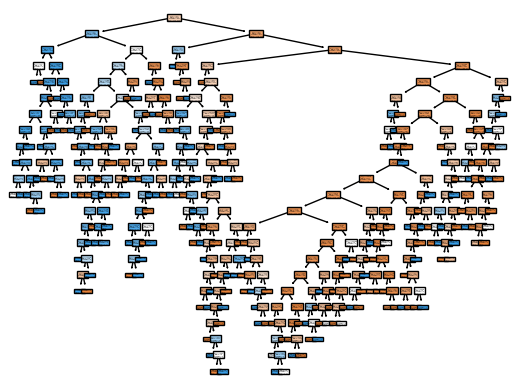

<Figure size 640x480 with 0 Axes>

In [30]:
tree.plot_tree(model.fit(X,y),filled=True)
plt.show()
plt.savefig("tree.png")


In [31]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[84, 21],
       [23, 51]], dtype=int64)

<AxesSubplot:>

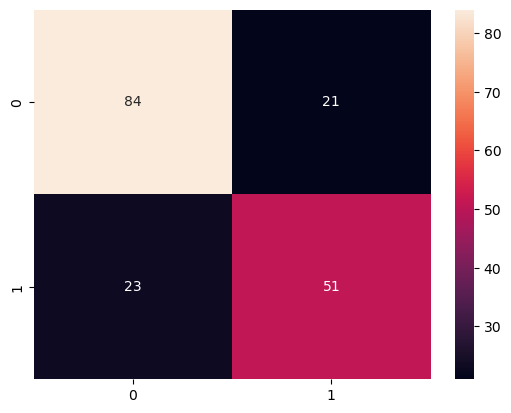

In [32]:
sns.heatmap(cm,annot=True)

### K Neares Neighbours (KNN)

In [37]:
model1=KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train,y_train)

KNeighborsClassifier()

In [39]:
y_pred1=model1.predict(X_test)
print("Accuracy score:",accuracy_score(y_test,y_pred1))
print("Precision score:",precision_score(y_test,y_pred1))
print("F1 score:",f1_score(y_test,y_pred1))
print("recall score:",recall_score(y_test,y_pred1))
print("Confusion matrix:",confusion_matrix(y_test,y_pred1))

Accuracy score: 0.6927374301675978
Precision score: 0.6557377049180327
F1 score: 0.5925925925925926
recall score: 0.5405405405405406
Confusion matrix: [[84 21]
 [34 40]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
#hyperparameter tuning?
# कुनै प्यारामिटरले accuracy मा कति फरक लेराउछ भन्ने जनाउ ।


In [42]:
# कति प्यारामिटर राखने भन्नि कुरा चाहि gridsearchcv(grid search cross validation) ले बताउछ

### Random forest

In [44]:
model2=RandomForestClassifier()
model2.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
y_pred2=model2.predict(X_test)
print("Accuracy score:",accuracy_score(y_test,y_pred2))
print("Precision score:",precision_score(y_test,y_pred2))
print("F1 score:",f1_score(y_test,y_pred2))
print("recall score:",recall_score(y_test,y_pred2))
print("Confusion matrix:",confusion_matrix(y_test,y_pred2))

Accuracy score: 0.7988826815642458
Precision score: 0.7794117647058824
F1 score: 0.7464788732394366
recall score: 0.7162162162162162
Confusion matrix: [[90 15]
 [21 53]]


### Logistic Regression

In [46]:
model3=RandomForestClassifier()
model3.fit(X_train,y_train)
y_pred3=model2.predict(X_test)
print("Accuracy score:",accuracy_score(y_test,y_pred3))
print("Precision score:",precision_score(y_test,y_pred3))
print("F1 score:",f1_score(y_test,y_pred3))
print("recall score:",recall_score(y_test,y_pred3))
print("Confusion matrix:",confusion_matrix(y_test,y_pred3))

Accuracy score: 0.7988826815642458
Precision score: 0.7794117647058824
F1 score: 0.7464788732394366
recall score: 0.7162162162162162
Confusion matrix: [[90 15]
 [21 53]]


### Support Vector Machine

In [50]:
model4=SVC()
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)
print("Accuracy score:",accuracy_score(y_test,y_pred4))
print("Precision score:",precision_score(y_test,y_pred4))
print("F1 score:",f1_score(y_test,y_pred4))
print("recall score:",recall_score(y_test,y_pred4))
print("Confusion matrix:",confusion_matrix(y_test,y_pred4))

Accuracy score: 0.659217877094972
Precision score: 0.76
F1 score: 0.3838383838383838
recall score: 0.25675675675675674
Confusion matrix: [[99  6]
 [55 19]]


### Naive Bayes

In [53]:
model5=GaussianNB()
model5.fit(X_train,y_train)
y_pred5=model5.predict(X_test)
print("Accuracy score:",accuracy_score(y_test,y_pred5))
print("Precision score:",precision_score(y_test,y_pred5))
print("F1 score:",f1_score(y_test,y_pred5))
print("recall score:",recall_score(y_test,y_pred5))
print("Confusion matrix:",confusion_matrix(y_test,y_pred5))

Accuracy score: 0.7877094972067039
Precision score: 0.7571428571428571
F1 score: 0.736111111111111
recall score: 0.7162162162162162
Confusion matrix: [[88 17]
 [21 53]]


In [54]:
# comparision of precison score.
print("Precision score of Decision Tree:",precision_score(y_test,y_pred))
print("Precision score of KNeighbor:",precision_score(y_test,y_pred1))
print("Precision score of random forest:",precision_score(y_test,y_pred2))
print("Precision score of logistic regression:",precision_score(y_test,y_pred3))
print("Precision score of svm:",precision_score(y_test,y_pred4))
print("Precision score of Naive:",precision_score(y_test,y_pred5))


Precision score of Decision Tree: 0.7083333333333334
Precision score of KNeighbor: 0.6557377049180327
Precision score of random forest: 0.7794117647058824
Precision score of logistic regression: 0.7794117647058824
Precision score of svm: 0.76
Precision score of Naive: 0.7571428571428571


### Perform cross_validation_score over all algorithm

In [59]:
#define the models
models=[LogisticRegression(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),DecisionTreeClassifier(),GaussianNB()]
names=["Logistic Regression","KNN","Rdmforest","SVM","DecTree","Naive"]

#perform k-fold cross validation for each model
k=10
for name,model in zip(names,models):
    cv_scores=cross_val_score(model,X_train,y_train,cv=k)
    print(f"{name}CV accuracy:{np.mean(cv_scores):.3f}+/-{np.std(cv_scores):.3f}")

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic RegressionCV accuracy:0.796+/-0.071
KNNCV accuracy:0.708+/-0.044


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

RdmforestCV accuracy:0.805+/-0.032
SVMCV accuracy:0.671+/-0.030
DecTreeCV accuracy:0.750+/-0.038
NaiveCV accuracy:0.793+/-0.083


### using grid search cv for best cross validation score

In [63]:
#define parameter

param_grid={'C':[0.1,1,10],
            'kernel':['linear','rbf'],
            'gamma':[0.1,1,10]
           }
grid_search=GridSearchCV(SVC(),param_grid,cv=5)
grid_search.fit(X_train,y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best cross validation score: 0.79
